In [101]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
import matplotlib.pyplot as plt
from PIL import Image

### Constant
Define the Constants

In [102]:
DATA_DIR = "data"
Train_DIR = os.path.join(DATA_DIR, "train")
Test_DIR = os.path.join(DATA_DIR, "test")
CATs_DIR = "cats"
DOGs_DIR = "dogs"

In [103]:
class CatAndDogDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        """
        Arguments:
            root_dir (string): Directory with all the images
        """
        self.root_dir = root_dir
        self.transforms = transforms
        self.classes = os.listdir(root_dir)
        self.images = []
        self.labels = []
        for c in self.classes:
            for f in os.listdir(os.path.join(root_dir, c)):
                if f.endswith(".jpg"):
                    self.labels.append(self.classes.index(c))
                    self.images.append(f)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(
            self.root_dir, self.classes[self.labels[idx]], self.images[idx]
        )

        image = Image.open(img_name)
        if self.transforms:
            image = self.transforms(image)
        return image, self.labels[idx]

In [104]:
transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [105]:
trainset = CatAndDogDataset(Train_DIR, transforms=transforms)
testset = CatAndDogDataset(Test_DIR, transforms=transforms)

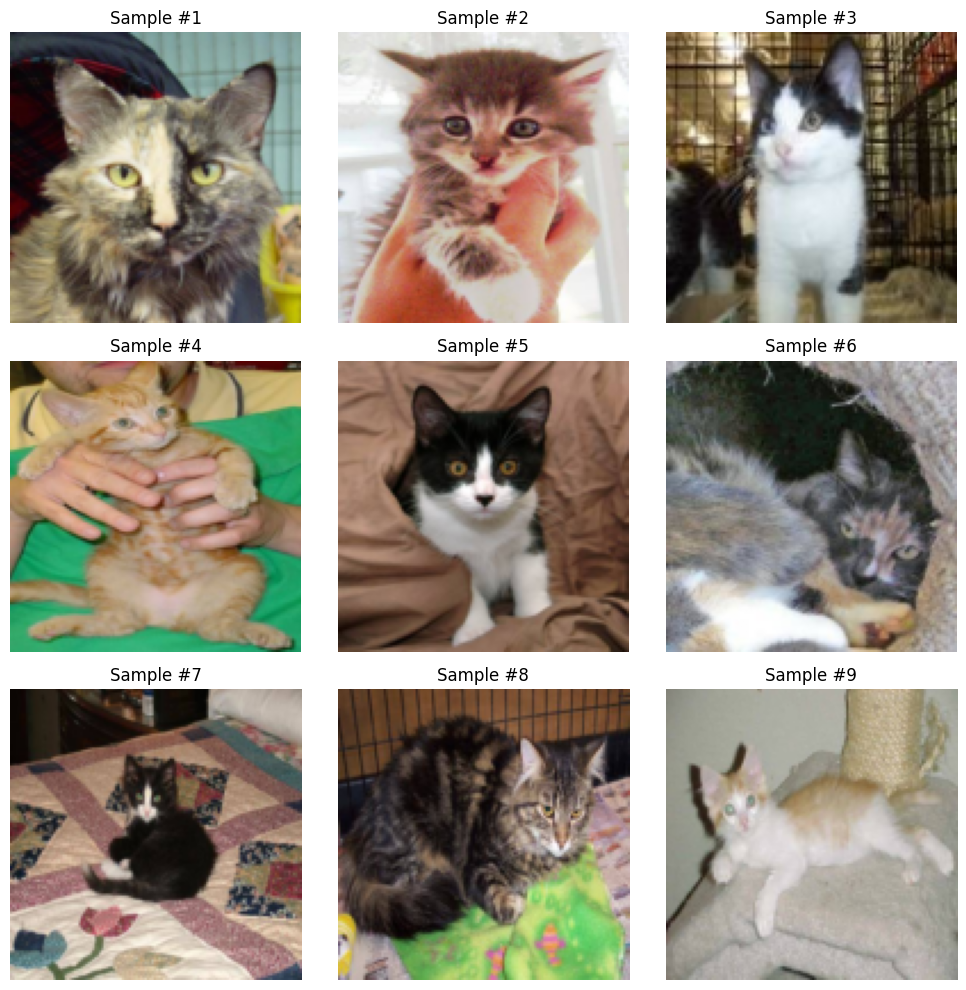

In [106]:
fig = plt.figure(figsize=(10, 10))

rows, cols = 3, 3  # Define the number of rows and columns for the grid

for i in range(1, rows * cols + 1):
    sample, label = trainset[i]

    ax = plt.subplot(rows, cols, i)
    ax.set_title("Sample #{}".format(i))
    ax.axis("off")
    plt.imshow(sample.permute(1, 2, 0))  # Transpose the image data

plt.tight_layout()
plt.show()

In [107]:
trainLoader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)
testLoader = DataLoader(testset, batch_size=4, shuffle=True, num_workers=0)

Feature batch shape: torch.Size([4, 3, 128, 128])
Labels batch shape: torch.Size([4])


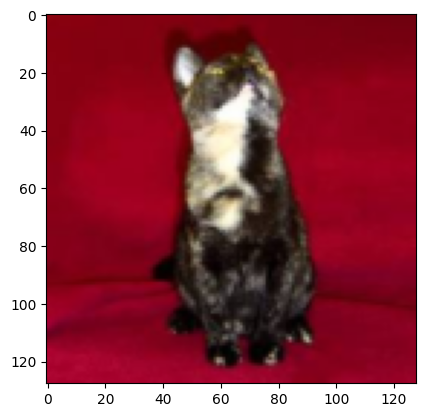

Label: 0


In [108]:
# Display image and label.
train_features, train_labels = next(iter(trainLoader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")

plt.show()